In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



In [3]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


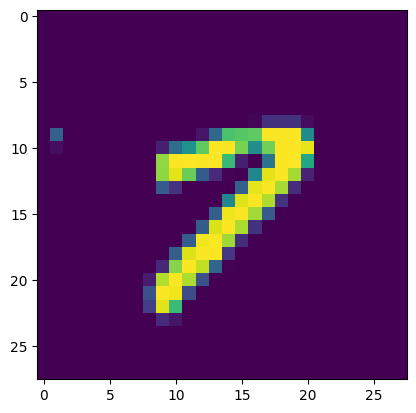

7


In [7]:
plt.imshow(X_train[29])
plt.show()

#Print the corresponding label
print(Y_train[29])

In [8]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [9]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
#scaling the values
X_train = X_train/255
X_test = X_test/255


In [11]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#Building the neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')

])


In [13]:

model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1342 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0992 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0812 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0671 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0581 - accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0491 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0439 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0383 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.033

In [15]:
loss , accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 951us/step - loss: 0.0984 - accuracy: 0.9726


In [16]:
print(X_test.shape)

(10000, 28, 28)


In [17]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

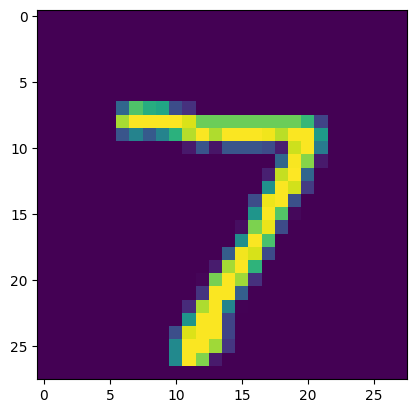

In [18]:
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)
Y_pred

313/313 [==============================] - 0s 837us/step


array([[3.5105057e-03, 3.4780420e-02, 2.0432641e-01, ..., 9.9998391e-01,
        3.1889711e-02, 1.0090678e-01],
       [1.7673448e-02, 9.8253858e-01, 9.9999928e-01, ..., 3.9228752e-08,
        2.8128859e-01, 6.3970296e-10],
       [3.4114202e-03, 9.9968737e-01, 1.9287319e-01, ..., 8.3355583e-02,
        1.8173261e-01, 5.1222029e-05],
       ...,
       [9.0887255e-08, 3.2164101e-04, 8.0847481e-11, ..., 9.9818671e-01,
        9.7814322e-02, 9.9996954e-01],
       [1.3755916e-05, 1.6642369e-01, 3.9816964e-08, ..., 1.0043334e-07,
        9.9998152e-01, 3.5359450e-03],
       [1.2705447e-01, 3.3335793e-05, 3.4215838e-02, ..., 2.6191900e-09,
        8.8262367e-01, 2.5183591e-04]], dtype=float32)

In [21]:
Y_pred.shape

(10000, 10)

In [22]:
Y_pred[0]

array([3.5105057e-03, 3.4780420e-02, 2.0432641e-01, 3.3632481e-01,
       2.2399799e-05, 8.7830182e-03, 5.9718604e-07, 9.9998391e-01,
       3.1889711e-02, 1.0090678e-01], dtype=float32)

In [23]:
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 5, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 8, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
conf_mat = confusion_matrix(Y_test,Y_pred_label)

In [26]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    1,    0,    5,    1,    0,    3,    3],
       [   0, 1119,    4,    1,    0,    4,    1,    1,    5,    0],
       [   3,    2, 1002,    9,    4,    0,    1,    3,    8,    0],
       [   0,    0,    5,  974,    0,   21,    0,    5,    5,    0],
       [   0,    1,    4,    1,  952,    3,    6,    1,    1,   13],
       [   1,    0,    0,    3,    0,  884,    2,    0,    1,    1],
       [   6,    3,    1,    1,    3,   21,  918,    0,    5,    0],
       [   2,    1,   11,    2,    2,    0,    0,  999,    4,    7],
       [   0,    1,    2,    8,    6,   20,    0,    2,  932,    3],
       [   1,    1,    0,    6,    7,    8,    0,    3,    5,  978]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted_label')

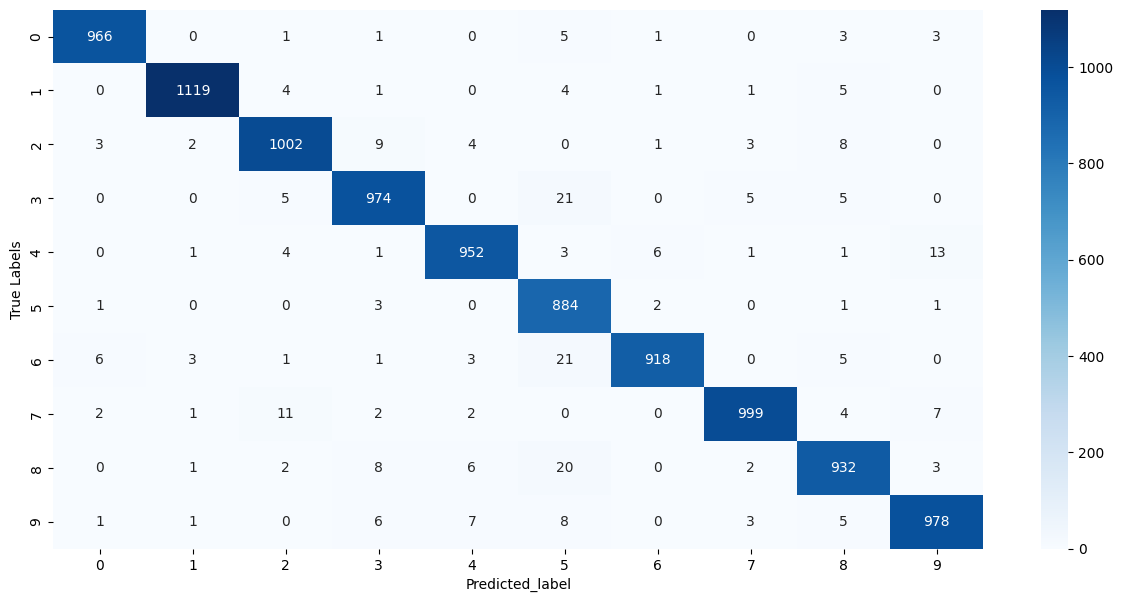

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted_label')

In [35]:
#Building a predictive system
input_image_path='mnist.png'
input_image = cv2.imread(input_image_path)

In [36]:
type(input_image)

numpy.ndarray

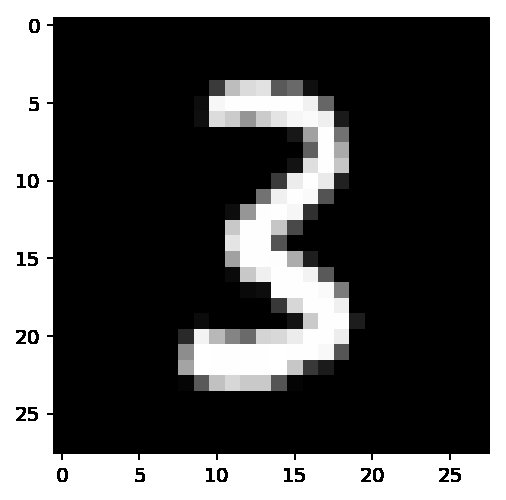

In [37]:
cv2_imshow(input_image)

In [38]:
input_image.shape

(500, 506, 3)

In [39]:
greyscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [42]:
greyscale.shape

(500, 506)

In [43]:
input_image_resize=cv2.resize(greyscale,(28,28))

In [44]:
input_image_resize.shape

(28, 28)

In [45]:
cv2_imshow(input_image_resize)

In [46]:
input_image_resize=input_image_resize/255

In [47]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [48]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[2.86043647e-18 2.98342411e-06 8.86664033e-01 1.00000000e+00
  7.23280728e-28 2.39537542e-07 4.39779920e-18 1.00000000e+00
  4.78449313e-15 1.06174756e-10]]


In [49]:
pred_label = np.argmax(input_prediction)

In [50]:
pred_label

3

Path of the image to be predicted:mnist.png


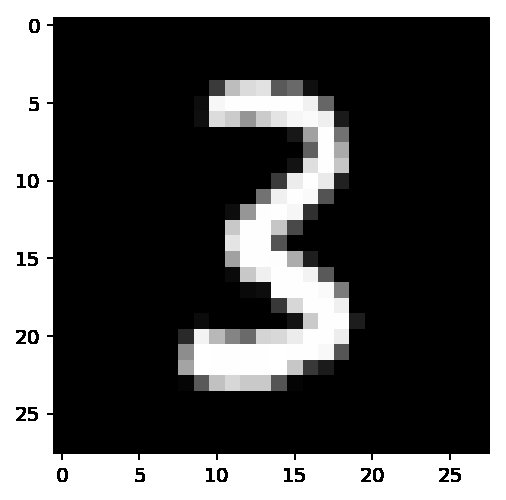

1/1 [==============================] - 0s 15ms/step
The handwritten digit is recognized as  3


In [53]:
input_image_path=input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

greyscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(greyscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

pred_label = np.argmax(input_prediction)

print("The handwritten digit is recognized as ",pred_label)

